# **Import libraries**

In [71]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [72]:
data = pd.read_csv('credit_card_fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


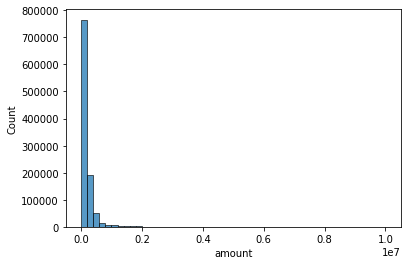

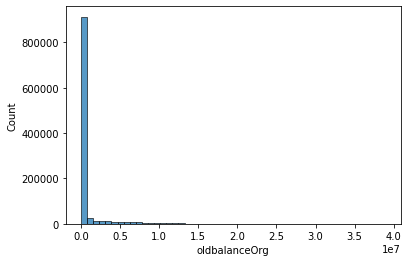

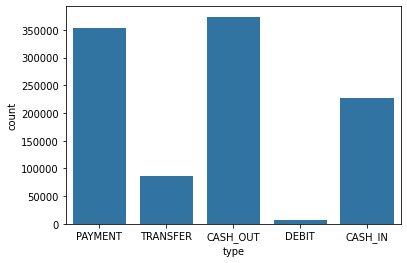

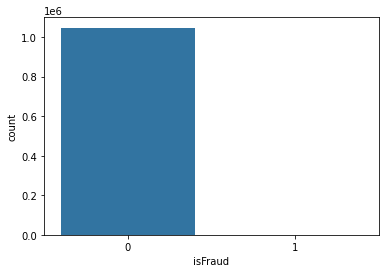

In [73]:


# Plot the distribution of the 'amount' column
sns.histplot(data=data, x='amount', bins=50)
plt.show()


# Plot the distribution of the 'oldbalanceOrg' column
sns.histplot(data=data, x='oldbalanceOrg', bins=50)
plt.show()

# Plot the count of the 'type' column
sns.countplot(data=data, x='type')
plt.show()

# Plot the count of the 'isFraud' column
sns.countplot(data=data, x='isFraud')
plt.show()





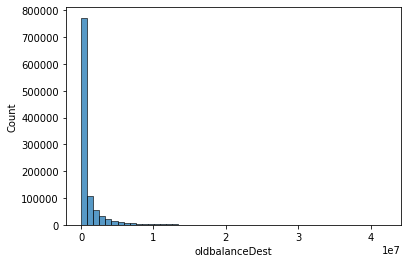

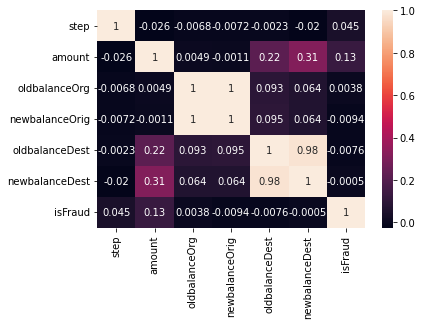

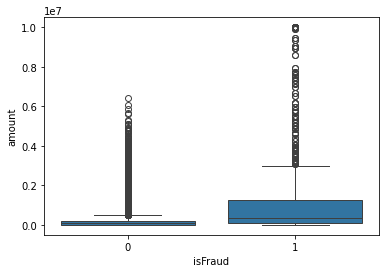

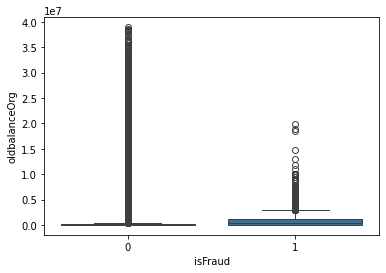

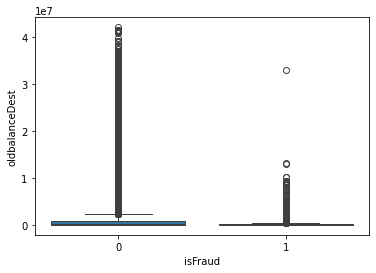

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: count, Length: 449635, dtype: int64

In [74]:
# Plot the distribution of the 'oldbalanceDest' column
sns.histplot(data=data, x='oldbalanceDest', bins=50)
plt.show()

# Plot the correlation matrix of the numerical columns
corr = data[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True)
plt.show()


# Plot the boxplot of the 'amount' column by 'isFraud'
sns.boxplot(data=data, x='isFraud', y='amount')
plt.show()

# Plot the boxplot of the 'oldbalanceOrg' column by 'isFraud'
sns.boxplot(data=data, x='isFraud', y='oldbalanceOrg')
plt.show()

# Plot the boxplot of the 'oldbalanceDest' column by 'isFraud'
sns.boxplot(data=data, x='isFraud', y='oldbalanceDest')
plt.show()

# nameOrig and nameDest analysis
data['nameOrig'].value_counts()
data['nameDest'].value_counts()




In [98]:
# is fraud 1 count
data[data['isFraud'] == 1].count()



step              1142
type              1142
amount            1142
oldbalanceOrg     1142
newbalanceOrig    1142
oldbalanceDest    1142
newbalanceDest    1142
isFraud           1142
dtype: int64

In [97]:
# is fraud 0 count
data[data['isFraud'] == 0].count()



step              1047433
type              1047433
amount            1047433
oldbalanceOrg     1047433
newbalanceOrig    1047433
oldbalanceDest    1047433
newbalanceDest    1047433
isFraud           1047433
dtype: int64

In [99]:
# so less is fraud 1, so we need to balance the data
# we can use undersampling or oversampling

# undersampling
# take the same number of fraud and non fraud data 

# lets make over 5 transactions 1 fraud so we can take 5 non fraud data for each fraud data
multiplier = 5
data_fraud = data[data['isFraud'] == 1]
data_non_fraud = data[data['isFraud'] == 0]

data_non_fraud = data_non_fraud.sample(n=multiplier*data_fraud.shape[0])

data = pd.concat([data_fraud, data_non_fraud])

In [102]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
251,1,TRANSFER,2806.00,2806.00,0.00,0.0,0.00,1
252,1,CASH_OUT,2806.00,2806.00,0.00,26202.0,0.00,1
680,1,TRANSFER,20128.00,20128.00,0.00,0.0,0.00,1
...,...,...,...,...,...,...,...,...
171038,12,CASH_IN,421047.04,68795.00,489842.04,0.0,175806.78,0
469948,19,PAYMENT,4356.71,481456.91,477100.20,0.0,0.00,0
1015351,47,PAYMENT,3505.24,10866.00,7360.76,0.0,0.00,0
920165,43,PAYMENT,39832.10,29921.00,0.00,0.0,0.00,0


# Split the data into features and labels

In [104]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Encode the categorical features

In [105]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)

In [106]:
# nameOrig and nameDest have too many unique values, lets drop them

X = X.drop(['nameOrig', 'nameDest'], axis=1)

KeyError: "['nameOrig', 'nameDest'] not found in axis"

# Normalize the numerical features

In [107]:
# normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

# Split the data into train and test sets

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into tensors

In [109]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)


# Define the neural network model

In [110]:
class Net(nn.Module):
  def __init__(self, input_features=X_train.shape[1]):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_features, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 128)
    self.fc4 = nn.Linear(128, 64)
    self.fc5 = nn.Linear(64, 2)
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = torch.relu(self.fc2(x))
    x = self.dropout(x)
    x = torch.relu(self.fc3(x))
    x = self.dropout(x)
    x = torch.relu(self.fc4(x))
    x = self.dropout(x)
    x = self.fc5(x)

    return x

In [111]:
X_train.shape[1]

10

# Create an instance of the model

In [112]:
model = Net(X_train.shape[1])

In [113]:
model.parameters()

<generator object Module.parameters at 0x178239120>

# Define the loss function and the optimizer

In [114]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [115]:


def train_model(model, criterion, optimizer, X_train, y_train, epochs=10):
  for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    # Forward pass
    outputs = model(X_train)
    # Compute the loss
    loss = criterion(outputs, y_train)
    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print the loss every epoch
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Train the model for 10 epochs

In [116]:
train_model(model, criterion, optimizer, X_train, y_train, epochs=10)

Epoch 1, Loss: 0.6596
Epoch 2, Loss: 0.6476
Epoch 3, Loss: 0.6374
Epoch 4, Loss: 0.6270
Epoch 5, Loss: 0.6178
Epoch 6, Loss: 0.6087
Epoch 7, Loss: 0.5994
Epoch 8, Loss: 0.5893
Epoch 9, Loss: 0.5795
Epoch 10, Loss: 0.5687


In [119]:
train_model(model, criterion, optimizer, X_train, y_train, epochs=500)

Epoch 1, Loss: 0.1336
Epoch 2, Loss: 0.1307
Epoch 3, Loss: 0.1292
Epoch 4, Loss: 0.1323
Epoch 5, Loss: 0.1284
Epoch 6, Loss: 0.1297
Epoch 7, Loss: 0.1316
Epoch 8, Loss: 0.1298
Epoch 9, Loss: 0.1307
Epoch 10, Loss: 0.1288
Epoch 11, Loss: 0.1280
Epoch 12, Loss: 0.1287
Epoch 13, Loss: 0.1285
Epoch 14, Loss: 0.1268
Epoch 15, Loss: 0.1264
Epoch 16, Loss: 0.1245
Epoch 17, Loss: 0.1262
Epoch 18, Loss: 0.1305
Epoch 19, Loss: 0.1272
Epoch 20, Loss: 0.1294
Epoch 21, Loss: 0.1253
Epoch 22, Loss: 0.1256
Epoch 23, Loss: 0.1266
Epoch 24, Loss: 0.1282
Epoch 25, Loss: 0.1239
Epoch 26, Loss: 0.1316
Epoch 27, Loss: 0.1268
Epoch 28, Loss: 0.1264
Epoch 29, Loss: 0.1217
Epoch 30, Loss: 0.1298
Epoch 31, Loss: 0.1244
Epoch 32, Loss: 0.1297
Epoch 33, Loss: 0.1231
Epoch 34, Loss: 0.1263
Epoch 35, Loss: 0.1258
Epoch 36, Loss: 0.1259
Epoch 37, Loss: 0.1215
Epoch 38, Loss: 0.1228
Epoch 39, Loss: 0.1201
Epoch 40, Loss: 0.1215
Epoch 41, Loss: 0.1233
Epoch 42, Loss: 0.1210
Epoch 43, Loss: 0.1268
Epoch 44, Loss: 0.12

# Set the model to evaluation mode

# Analyze the results

tensor([1, 0, 0,  ..., 0, 0, 1])
Confusion Matrix


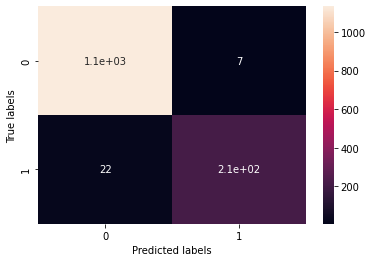

Precision Score
0.967741935483871
Recall Score
0.9051724137931034
F1 Score
0.9354120267260579
ROC AUC Score
0.9495133359571312


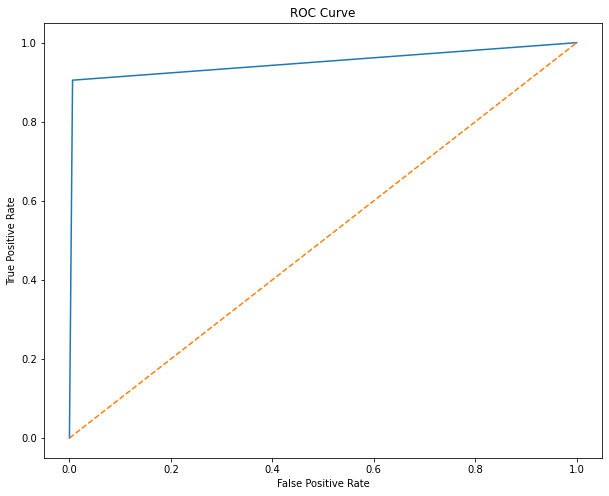

In [121]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Set the model to evaluation mode
model.eval()

# Get the predictions
y_pred = model(X_test)


# Get the predicted class
_, y_pred = torch.max(y_pred, 1)

print(y_pred)

# see how the model performed
print("Confusion Matrix")

#plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')



plt.show()

print("Precision Score")
print(precision_score(y_test, y_pred))

print("Recall Score")
print(recall_score(y_test, y_pred))

print("F1 Score")
print(f1_score(y_test, y_pred))

print("ROC AUC Score")
print(roc_auc_score(y_test, y_pred))

# Plot the ROC curve
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()




